In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dffish = pd.read_csv('fish_data.csv')

In [4]:
dffish

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


In [5]:
dffish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [6]:
dffish.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [7]:
pd.unique(dffish['species'])

array(['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus'], dtype=object)

In [8]:
x = dffish.iloc[:, 1:].values
y = dffish.iloc[:,[0]].values

In [9]:
x

array([[10.66,  3.45,  0.32],
       [ 6.91,  3.27,  0.47],
       [ 8.38,  3.46,  0.41],
       ...,
       [32.81,  6.25,  0.19],
       [29.78,  6.11,  0.21],
       [31.62,  6.14,  0.19]])

In [10]:
y

array([['Anabas testudineus'],
       ['Anabas testudineus'],
       ['Anabas testudineus'],
       ...,
       ['Sillaginopsis panijus'],
       ['Sillaginopsis panijus'],
       ['Sillaginopsis panijus']], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
labelEn = LabelEncoder()
y = labelEn.fit_transform(dffish['species'])

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_trainsc = scaler.fit_transform(x_train)
x_testsc = scaler.transform(x_test)

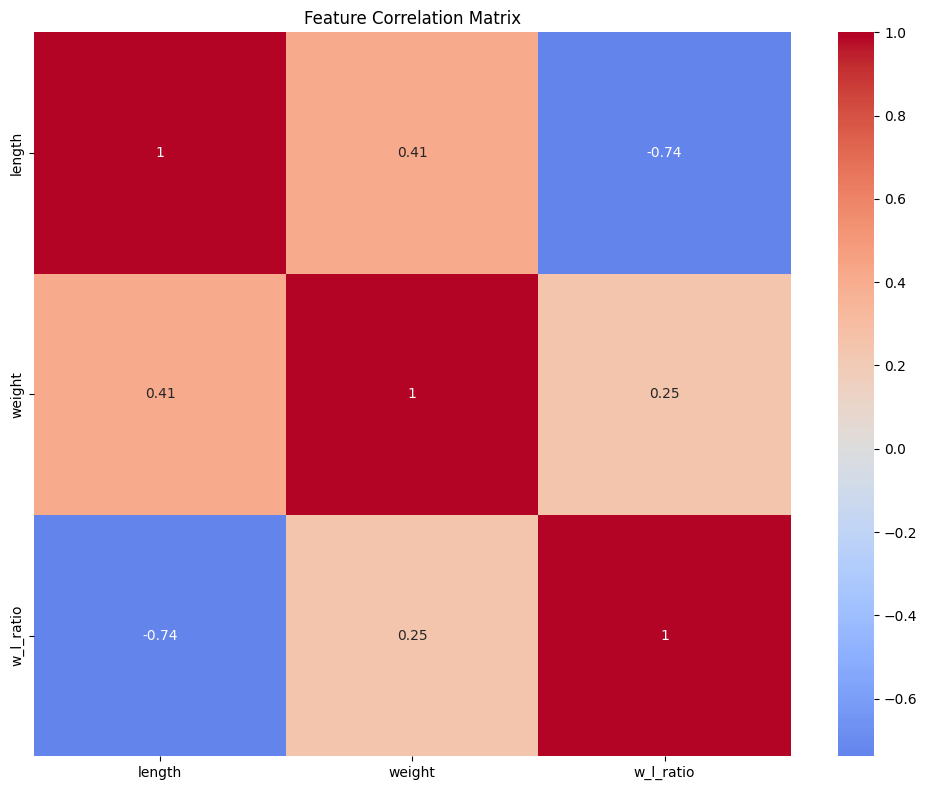

In [14]:
import seaborn as sns
plt.figure(figsize = (10, 8))
correlation_matrix = dffish[['length', 'weight', 'w_l_ratio']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [15]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(random_state=0)
perceptron.fit(x_trainsc, y_train)

Perceptron()

In [16]:
from sklearn.metrics import accuracy_score
y_prediksi = perceptron.predict(x_testsc)
akurasi_perceptron = accuracy_score(y_test, y_prediksi)

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sb

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        97
           1       1.00      1.00      1.00        96
           2       0.40      0.70      0.51       100
           3       0.69      1.00      0.82        85
           4       1.00      0.82      0.90        84
           5       0.81      0.99      0.89        85
           6       1.00      0.82      0.90        74
           7       0.00      0.00      0.00       103
           8       1.00      1.00      1.00        92

    accuracy                           0.80       816
   macro avg       0.76      0.81      0.77       816
weighted avg       0.74      0.80      0.76       816



c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

<Axes: >

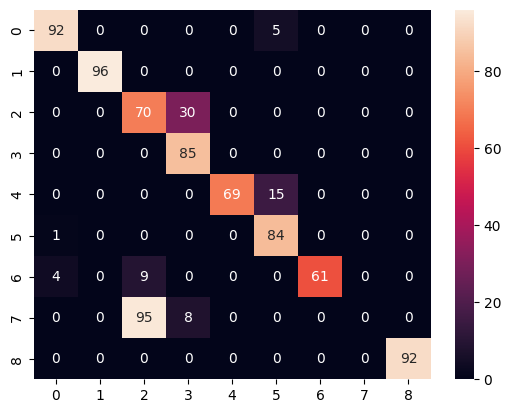

In [18]:
print(classification_report(y_test, y_prediksi))
sb.heatmap(confusion_matrix(y_test, y_prediksi), annot=True, fmt='d')

In [19]:
feature = ['length', 'weight', 'w_l_ratio']

# Pentingnya Fitur Perceptron
if hasattr(perceptron, 'coef_'):
    perceptron_penting = pd.DataFrame({'Feature': feature, 'Importance': np.abs(perceptron.coef_[0])}).sort_values('Importance', ascending=False)
    print("\nPentingnya Fitur perceptron:")
    print(perceptron_penting)


Pentingnya Fitur perceptron:
     Feature  Importance
0     length   36.337734
2  w_l_ratio   10.208944
1     weight    3.843434


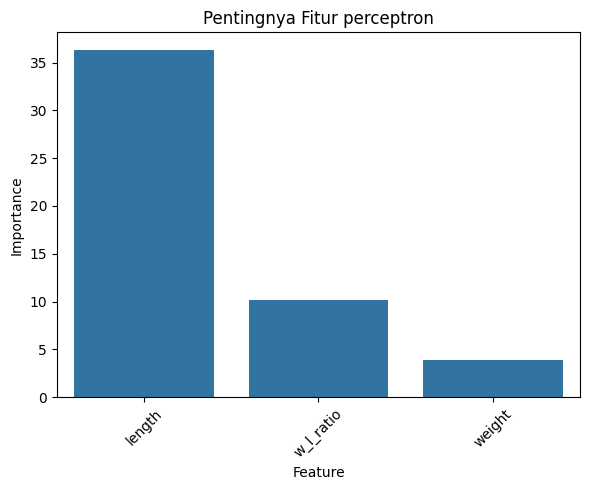

In [20]:
if hasattr(perceptron, 'coef_'):
    plt.figure(figsize = (6, 5))
    sns.barplot(data = perceptron_penting, x='Feature', y='Importance')
    plt.title('Pentingnya Fitur perceptron')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()

In [21]:
print("\nLaporan Klasifikasi Perceptron:")
print(classification_report(y_test, y_prediksi, target_names=['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus']))


Laporan Klasifikasi Perceptron:
                        precision    recall  f1-score   support

    Anabas testudineus       0.95      0.95      0.95        97
     Coilia dussumieri       1.00      1.00      1.00        96
Otolithoides biauritus       0.40      0.70      0.51       100
     Otolithoides pama       0.69      1.00      0.82        85
     Pethia conchonius       1.00      0.82      0.90        84
  Polynemus paradiseus       0.81      0.99      0.89        85
  Puntius lateristriga       1.00      0.82      0.90        74
        Setipinna taty       0.00      0.00      0.00       103
 Sillaginopsis panijus       1.00      1.00      1.00        92

              accuracy                           0.80       816
             macro avg       0.76      0.81      0.77       816
          weighted avg       0.74      0.80      0.76       816



c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [22]:
import pickle
pickle.dump(perceptron, open('perceptron_fish-scale.pkl', 'wb'))